In [1]:
# Start coding here...

In [ ]:
if (! require("tidyverse")) {install.packages("tidyverse") & library("tidyverse")}
if (! require("ggplot2")) {install.packages("ggplot2") & library("ggplot2")}
if (! require("patchwork")) {install.packages("patchwork") & library("patchwork")}
messages = FALSE

In [3]:
ZapA <- read.delim("GFP Results_ZapA.txt", header=TRUE,sep="\t",dec='.')

In [4]:
head(ZapA)

,n,Axis,Dia,Thr,startX,startY,Volume,Age,Area,MinDiaCenter,⋯,FluorCenter,FluorPole,ConcCenter,ConcOffCenter,FCPlus,AgeDia,RingFraction,ConcTotal,WallArea,ConcWall
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,3.5502,0.9008,3754.977,850,169,1.9371,75.6074,3.0238,0.7581,⋯,7.6024,2.6497,18.1332,8.7322,3.9414,27.0648,18.8980,10.7667,10.0467,2.0759
2,2,2.6472,0.9367,3754.977,836,404,1.5502,17.1112,2.2914,0.8948,⋯,6.8826,3.1564,13.5252,8.1097,2.7558,58.9716,17.9791,9.8876,7.7903,1.9675
3,3,3.4270,0.8922,3754.977,167,570,1.9342,61.8571,2.8868,0.8555,⋯,3.7658,1.3857,7.8689,5.1796,1.2870,22.5560,11.3840,5.8449,9.6058,1.1769
4,4,3.1342,0.9847,3754.977,897,633,2.0406,46.6568,2.8782,0.9395,⋯,8.0733,3.2482,12.7785,7.8291,3.1269,90.8078,16.3683,9.3617,9.6959,1.9703
5,5,2.4205,0.9189,3754.977,233,634,1.3885,6.8018,2.0430,0.9136,⋯,3.5008,1.9952,6.5644,5.0686,0.7978,44.0573,10.1820,5.6431,6.9876,1.1213
6,6,2.7141,0.9970,3754.977,72,638,1.7387,23.6700,2.4927,0.9391,⋯,5.1719,2.8261,8.2115,6.4520,1.1082,96.2525,8.9904,7.0895,8.5014,1.4499


In [5]:
str(ZapA)

'data.frame':	76 obs. of  24 variables:
 $ n            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Axis         : num  3.55 2.65 3.43 3.13 2.42 ...
 $ Dia          : num  0.901 0.937 0.892 0.985 0.919 ...
 $ Thr          : num  3755 3755 3755 3755 3755 ...
 $ startX       : num  850 836 167 897 233 ...
 $ startY       : num  169 404 570 633 634 638 661 661 699 700 ...
 $ Volume       : num  1.94 1.55 1.93 2.04 1.39 ...
 $ Age          : num  75.6 17.1 61.9 46.7 6.8 ...
 $ Area         : num  3.02 2.29 2.89 2.88 2.04 ...
 $ MinDiaCenter : num  0.758 0.895 0.856 0.94 0.914 ...
 $ MaxDia       : num  0.913 0.985 0.934 1.021 0.968 ...
 $ VolCenter    : num  0.419 0.509 0.479 0.632 0.533 ...
 $ FlChannel    : int  2 2 2 2 2 2 2 2 2 2 ...
 $ FluorTotal   : num  20.86 15.33 11.31 19.1 7.84 ...
 $ FluorCenter  : num  7.6 6.88 3.77 8.07 3.5 ...
 $ FluorPole    : num  2.65 3.16 1.39 3.25 2 ...
 $ ConcCenter   : num  18.13 13.53 7.87 12.78 6.56 ...
 $ ConcOffCenter: num  8.73 8.11 5.18 7.83 5.07 ...
 $ F

In [6]:
summary(ZapA)

       n              Axis            Dia              Thr      
 Min.   : 1.00   Min.   :1.362   Min.   :0.8121   Min.   :3755  
 1st Qu.:19.75   1st Qu.:2.673   1st Qu.:0.8880   1st Qu.:3755  
 Median :38.50   Median :2.934   Median :0.9173   Median :4167  
 Mean   :38.50   Mean   :3.032   Mean   :0.9166   Mean   :4038  
 3rd Qu.:57.25   3rd Qu.:3.452   3rd Qu.:0.9453   3rd Qu.:4223  
 Max.   :76.00   Max.   :4.402   Max.   :1.1039   Max.   :4223  
     startX           startY           Volume            Age       
 Min.   :  72.0   Min.   :   3.0   Min.   :0.1486   Min.   : 0.00  
 1st Qu.: 423.8   1st Qu.: 508.5   1st Qu.:1.4992   1st Qu.:18.99  
 Median : 715.5   Median : 719.0   Median :1.7185   Median :40.87  
 Mean   : 673.9   Mean   : 714.5   Mean   :1.7091   Mean   :43.61  
 3rd Qu.: 905.5   3rd Qu.: 973.5   3rd Qu.:1.9506   3rd Qu.:66.67  
 Max.   :1276.0   Max.   :1234.0   Max.   :2.6097   Max.   :98.11  
      Area        MinDiaCenter        MaxDia         VolCenter       

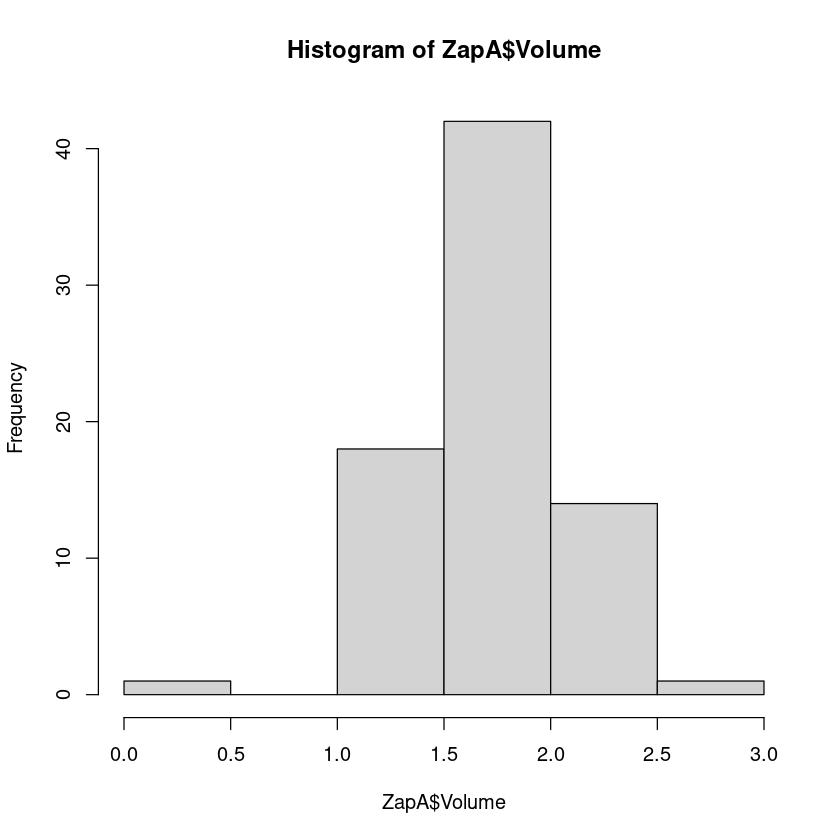

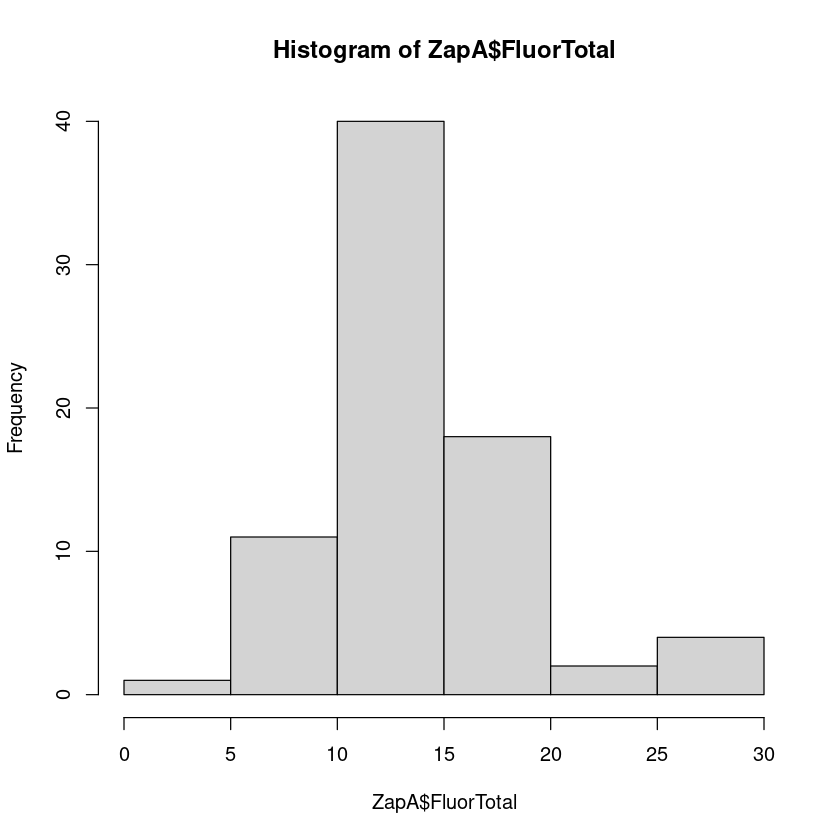

$breaks
[1] 0.0 0.5 1.0 1.5 2.0 2.5 3.0

$counts
[1]  1  0 18 42 14  1

$density
[1] 0.02631579 0.00000000 0.47368421 1.10526316 0.36842105 0.02631579

$mids
[1] 0.25 0.75 1.25 1.75 2.25 2.75

$xname
[1] "ZapA$Volume"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

$breaks
[1]  0  5 10 15 20 25 30

$counts
[1]  1 11 40 18  2  4

$density
[1] 0.002631579 0.028947368 0.105263158 0.047368421 0.005263158 0.010526316

$mids
[1]  2.5  7.5 12.5 17.5 22.5 27.5

$xname
[1] "ZapA$FluorTotal"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

$breaks
[1] -4 -3 -2 -1  0  1  2  3

$counts
[1]  1  0  7 31 25  9  3

$density
[1] 0.01315789 0.00000000 0.09210526 0.40789474 0.32894737 0.11842105 0.03947368

$mids
[1] -3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5

$xname
[1] "scale(ZapA$FluorCenter, center = TRUE, scale = TRUE)"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

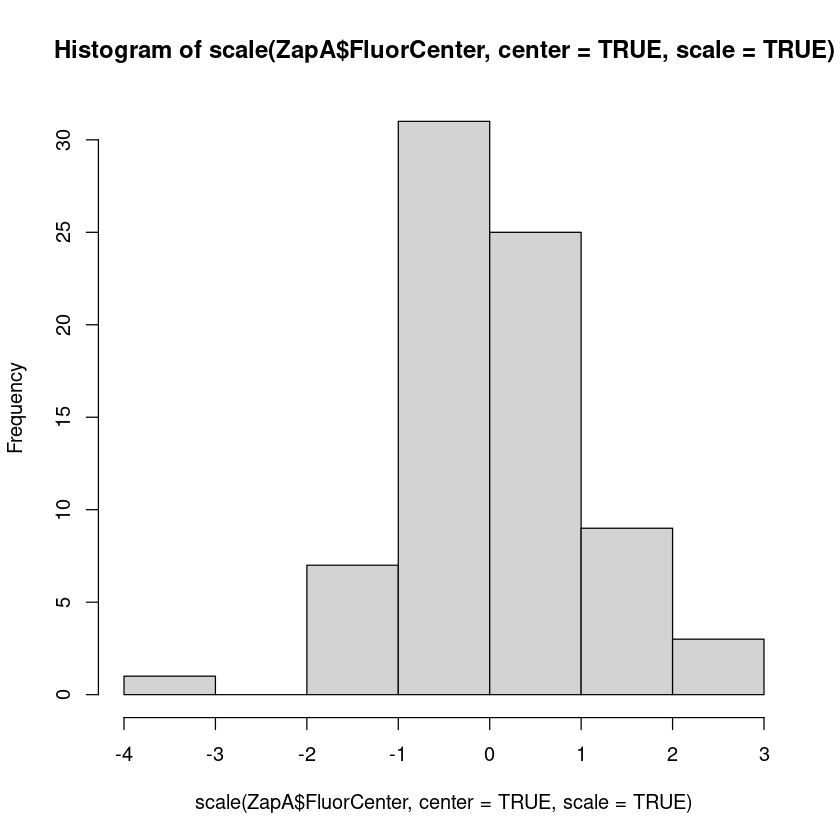

In [7]:
hist_volume <- hist(ZapA$Volume)
hist_fluortotal <- hist(ZapA$FluorTotal)
hist_fluorcenter <- hist(scale(ZapA$FluorCenter,center=TRUE,scale=TRUE))
hist_volume
hist_fluortotal
hist_fluorcenter

In [8]:
ZapA <- scale(ZapA, center = TRUE, scale = TRUE)

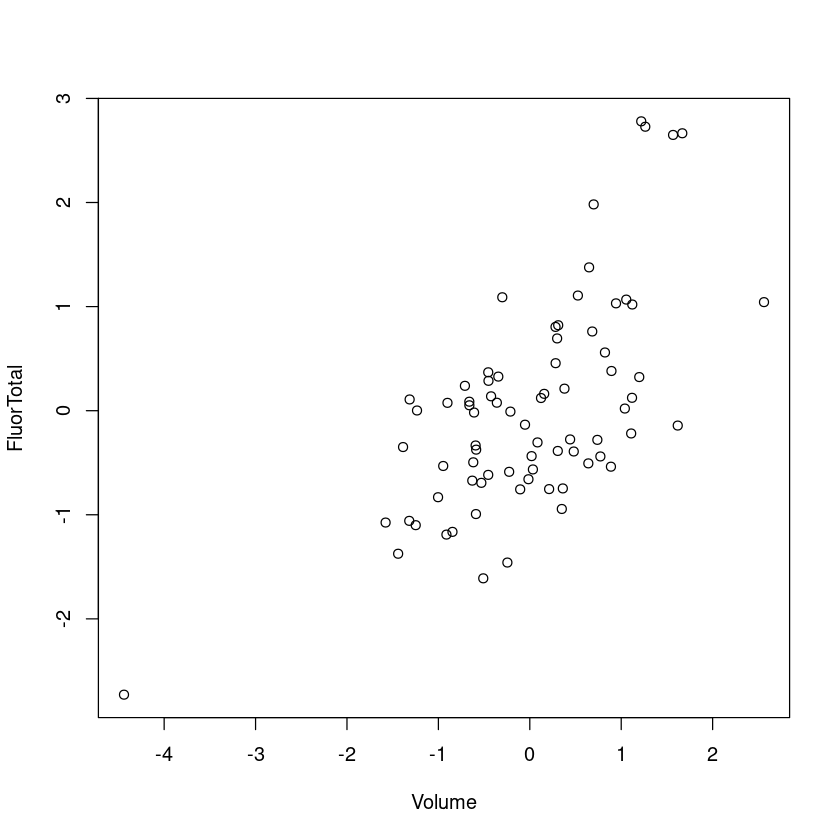

In [9]:
plot(FluorTotal ~ Volume, data = ZapA)

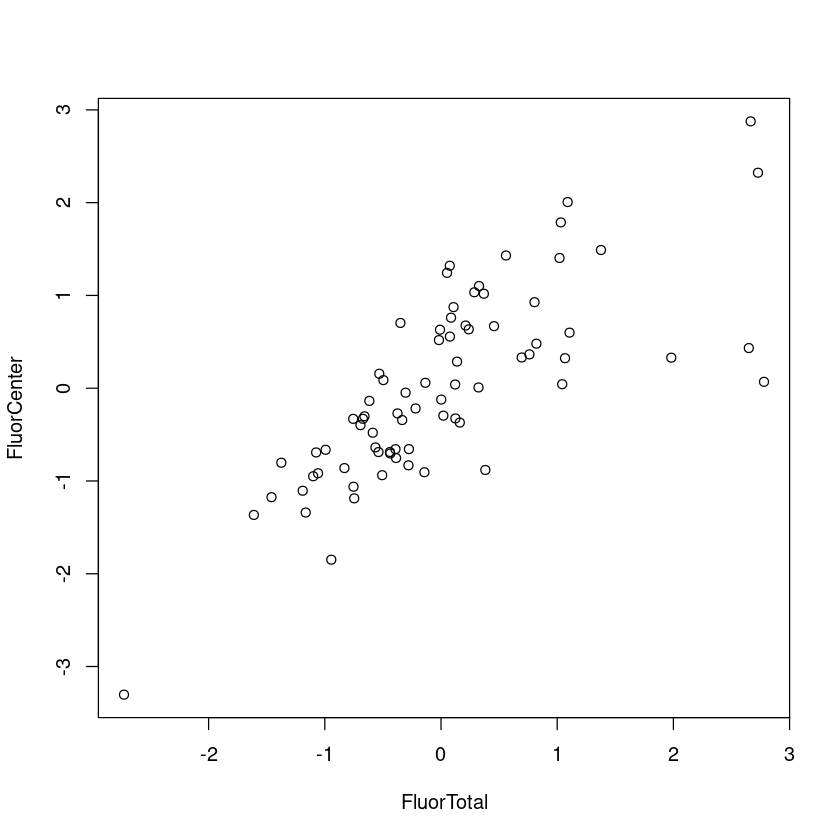

In [10]:
plot(FluorCenter ~ FluorTotal, data = ZapA)

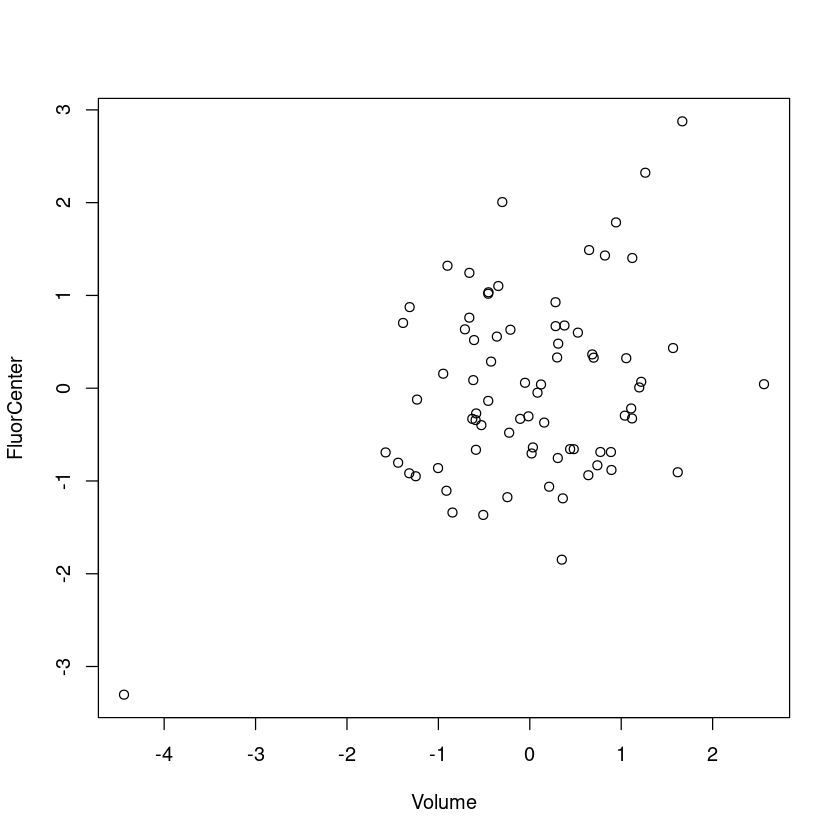

In [11]:
plot(FluorCenter ~ Volume, data = ZapA)

In [12]:
ZapA <- as_tibble(ZapA)

In [13]:
fluortotal_volume_lm <- lm(Volume ~FluorTotal, data = ZapA)

In [14]:
summary(fluortotal_volume_lm)


Call:
lm(formula = Volume ~ FluorTotal, data = ZapA)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.66062 -0.53431 -0.07376  0.47834  1.88196 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.016e-16  8.756e-02   0.000        1    
FluorTotal  6.520e-01  8.815e-02   7.396 1.78e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7634 on 74 degrees of freedom
Multiple R-squared:  0.4251,	Adjusted R-squared:  0.4173 
F-statistic: 54.71 on 1 and 74 DF,  p-value: 1.78e-10


The results show that for every unit of volume concentration, 0.65 points increase for fluorescence units. with an error margin of +/-0.088. This is with a probability of p<0.05 which indicates that it is highly likely that total fluorescence is positively correlated/dependent on volume.

In [15]:
fluor_center_total.lm <- lm(Volume ~ FluorTotal + FluorCenter, data = ZapA)

In [16]:
summary(fluor_center_total.lm)


Call:
lm(formula = Volume ~ FluorTotal + FluorCenter, data = ZapA)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.13120 -0.40972 -0.00255  0.48849  1.59264 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.697e-17  8.328e-02   0.000  1.00000    
FluorTotal   9.453e-01  1.296e-01   7.296 2.94e-10 ***
FluorCenter -3.847e-01  1.296e-01  -2.969  0.00404 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.726 on 73 degrees of freedom
Multiple R-squared:  0.487,	Adjusted R-squared:  0.4729 
F-statistic: 34.65 on 2 and 73 DF,  p-value: 2.626e-11


In [17]:
fluor_center.lm <- lm(Volume ~ FluorCenter, data=ZapA)
summary(fluor_center.lm)


Call:
lm(formula = Volume ~ FluorCenter, data = ZapA)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3290 -0.6644  0.0938  0.6524  2.5475 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 8.617e-17  1.088e-01    0.00    1.000   
FluorCenter 3.361e-01  1.095e-01    3.07    0.003 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9482 on 74 degrees of freedom
Multiple R-squared:  0.1129,	Adjusted R-squared:  0.101 
F-statistic: 9.422 on 1 and 74 DF,  p-value: 0.002996


In [18]:
fluor.lm <- lm(FluorCenter ~ FluorTotal, data=ZapA)
summary(fluor.lm)


Call:
lm(formula = FluorCenter ~ FluorTotal, data = ZapA)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0507 -0.3614 -0.0522  0.4555  1.2625 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.200e-17  7.472e-02    0.00        1    
FluorTotal   7.625e-01  7.521e-02   10.14 1.22e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6514 on 74 degrees of freedom
Multiple R-squared:  0.5814,	Adjusted R-squared:  0.5757 
F-statistic: 102.8 on 1 and 74 DF,  p-value: 1.222e-15
